In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def read_oscillograph_data(file):
    return np.loadtxt(file, skiprows=5)


In [3]:
data = read_oscillograph_data("Feedback_11.08.23-/170823/F1interference_wo_mirror_statistics00000.txt")

In [4]:
data[:,1].sum()

37621.0

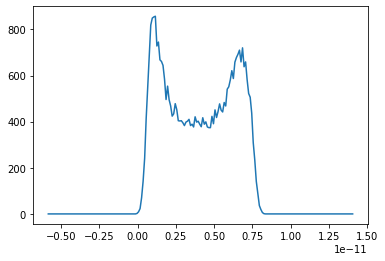

In [5]:
plt.plot(data[:,0], data[:,1])

In [19]:
d2 = read_oscillograph_data("Feedback_11.08.23-/170823/C3interference_with_mirror_30_train00000.txt")

In [20]:
d2.shape

(3999961, 2)

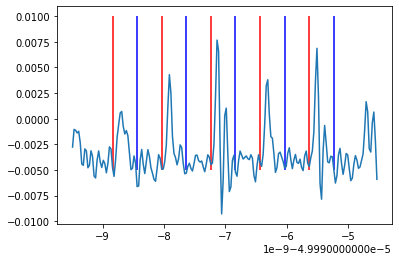

In [23]:
RR = np.arange(0, d2.shape[0]//20000)
step = d2[1,0] - d2[0,0]
period = int(np.round(800e-12 / step))
plt.plot(d2[RR,0], d2[RR,1])
plt.vlines(step*(period*np.arange(0,5) + 26) + d2[0,0],-0.005, 0.01, "red")
plt.vlines(step*(period*np.arange(0,5) + 42) + d2[0,0],-0.005, 0.01, "blue")

In [24]:
d11 = read_oscillograph_data("Feedback_11.08.23-/170823/C3interference_without_mirror_train00000.txt")
d12 = read_oscillograph_data("Feedback_11.08.23-/170823/C3interference_without_mirror_train00001.txt")

for_sum11 = np.reshape(d11[start_id:k,1], (16,-1), "F")
sums11 = np.sum(for_sum11, axis=0)
for_hist11 = sums11[0::2]*step
for_sum12 = np.reshape(d12[start_id:k,1], (16,-1), "F")
sums12 = np.sum(for_sum12, axis=0)
for_hist12 = sums12[0::2]*step

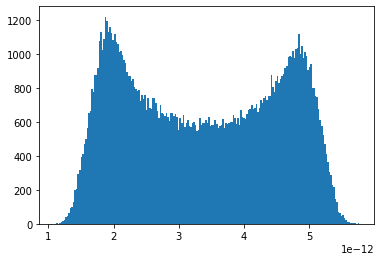

In [28]:
plt.hist(for_hist12, bins=200)
plt.show()

In [ ]:
a

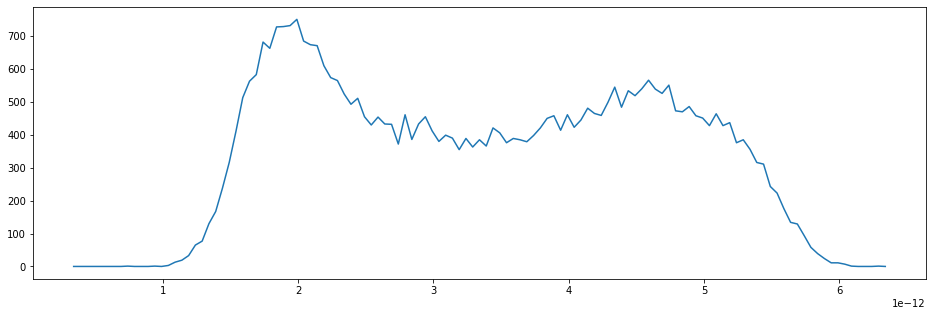

In [10]:
dataref = read_oscillograph_data("Feedback_11.08.23-/170823/F1interference_without_mirror_statistics00000.txt")
Nref = dataref[:,1].sum()
NR = 40
Range = np.arange(NR,200-NR+1)
plt.figure(figsize=(16,5))
plt.plot(dataref[Range,0],dataref[Range,1])
plt.show()

In [11]:
start_id = 26
hists1 = []

filename1 = "Feedback_11.08.23-/170823/C3interference_without_mirror_train0000"
for i in range(3):
    data1 = read_oscillograph_data(filename1+str(i)+".txt")
    k = int(np.trunc((data1.shape[0]-start_id)/16) * 16 + start_id)
    for_sum1 = np.reshape(data1[start_id:k,1], (16,-1), "F")
    sums1 = np.sum(for_sum1, axis=0)
    hists1.append(sums1[0::2]*step)

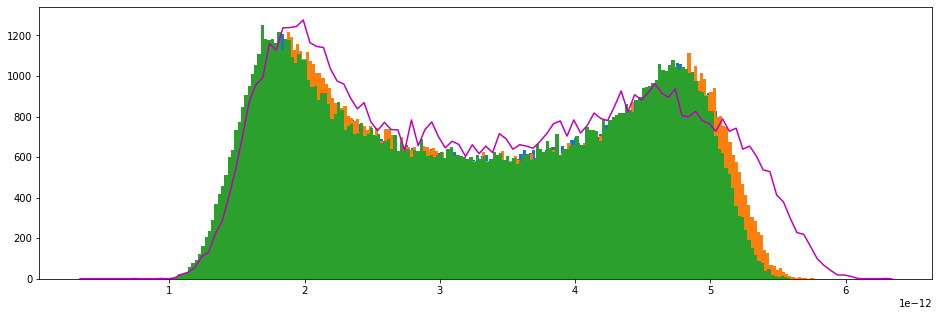

In [12]:
plt.figure(figsize=(16,5))
for hist in hists1:
    plt.hist(hist, bins=200)
plt.plot(dataref[Range,0], 1.7*dataref[Range,1], color="m")
plt.show()

In [13]:
start_id = 26
hists2 = []

filename2 = "Feedback_11.08.23-/170823/C3interference_without_mirror_train_after0000"
for i in range(3):
    data2 = read_oscillograph_data(filename2+str(i)+".txt")
    k = int(np.trunc((data2.shape[0]-start_id)/16) * 16 + start_id)
    for_sum2 = np.reshape(data2[start_id:k,1], (16,-1), "F")
    sums2 = np.sum(for_sum2, axis=0)
    hists2.append(sums2[0::2]*step)

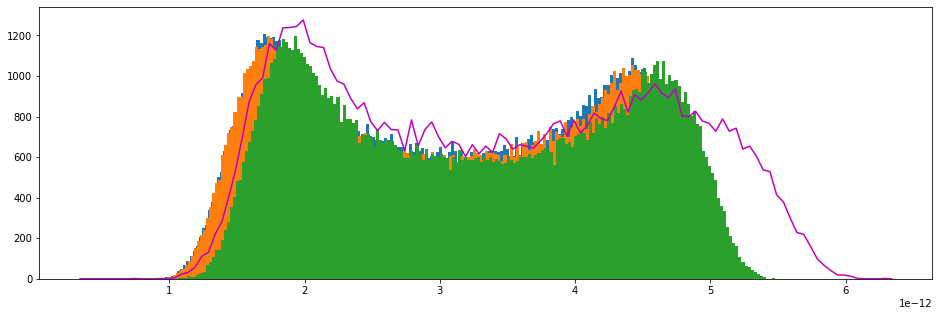

In [14]:
plt.figure(figsize=(16,5))
for hist in hists2:
    plt.hist(hist, bins=200)
plt.plot(dataref[Range,0], 1.7*dataref[Range,1], color="m")
plt.show()

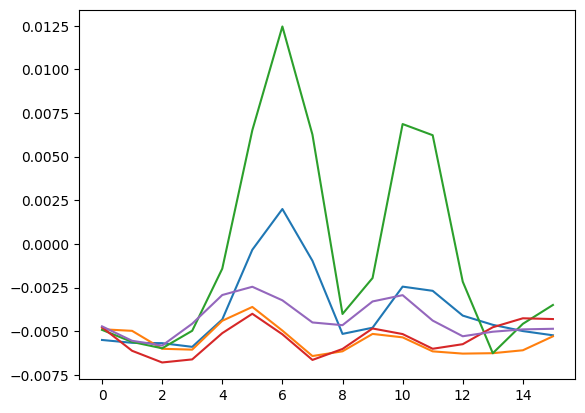

In [106]:
plt.plot(for_sum[:,0:5])

## First measurement

In [40]:
fprefix  = "Feedback_11.08.23-/170823/C3interference_with_mirror_"
fpostfix = "_train00000.txt"
lengths = [i for i in range(0, 51, 5)]

In [42]:
hists = []
fnames = [fprefix+str(l)+fpostfix for l in lengths]
lengths.append("W/O mirror")
fnames.append("Feedback_11.08.23-/170823/C3interference_without_mirror_train00000.txt")
start_id = 26
for file in fnames:
    data = read_oscillograph_data(file)
    k = int(np.trunc((data.shape[0]-start_id)/16) * 16 + start_id)
    for_sum = np.reshape(data[start_id:k,1], (16,-1), "F")
    sums = np.sum(for_sum, axis=0)
    hists.append(sums[0::2]*step)

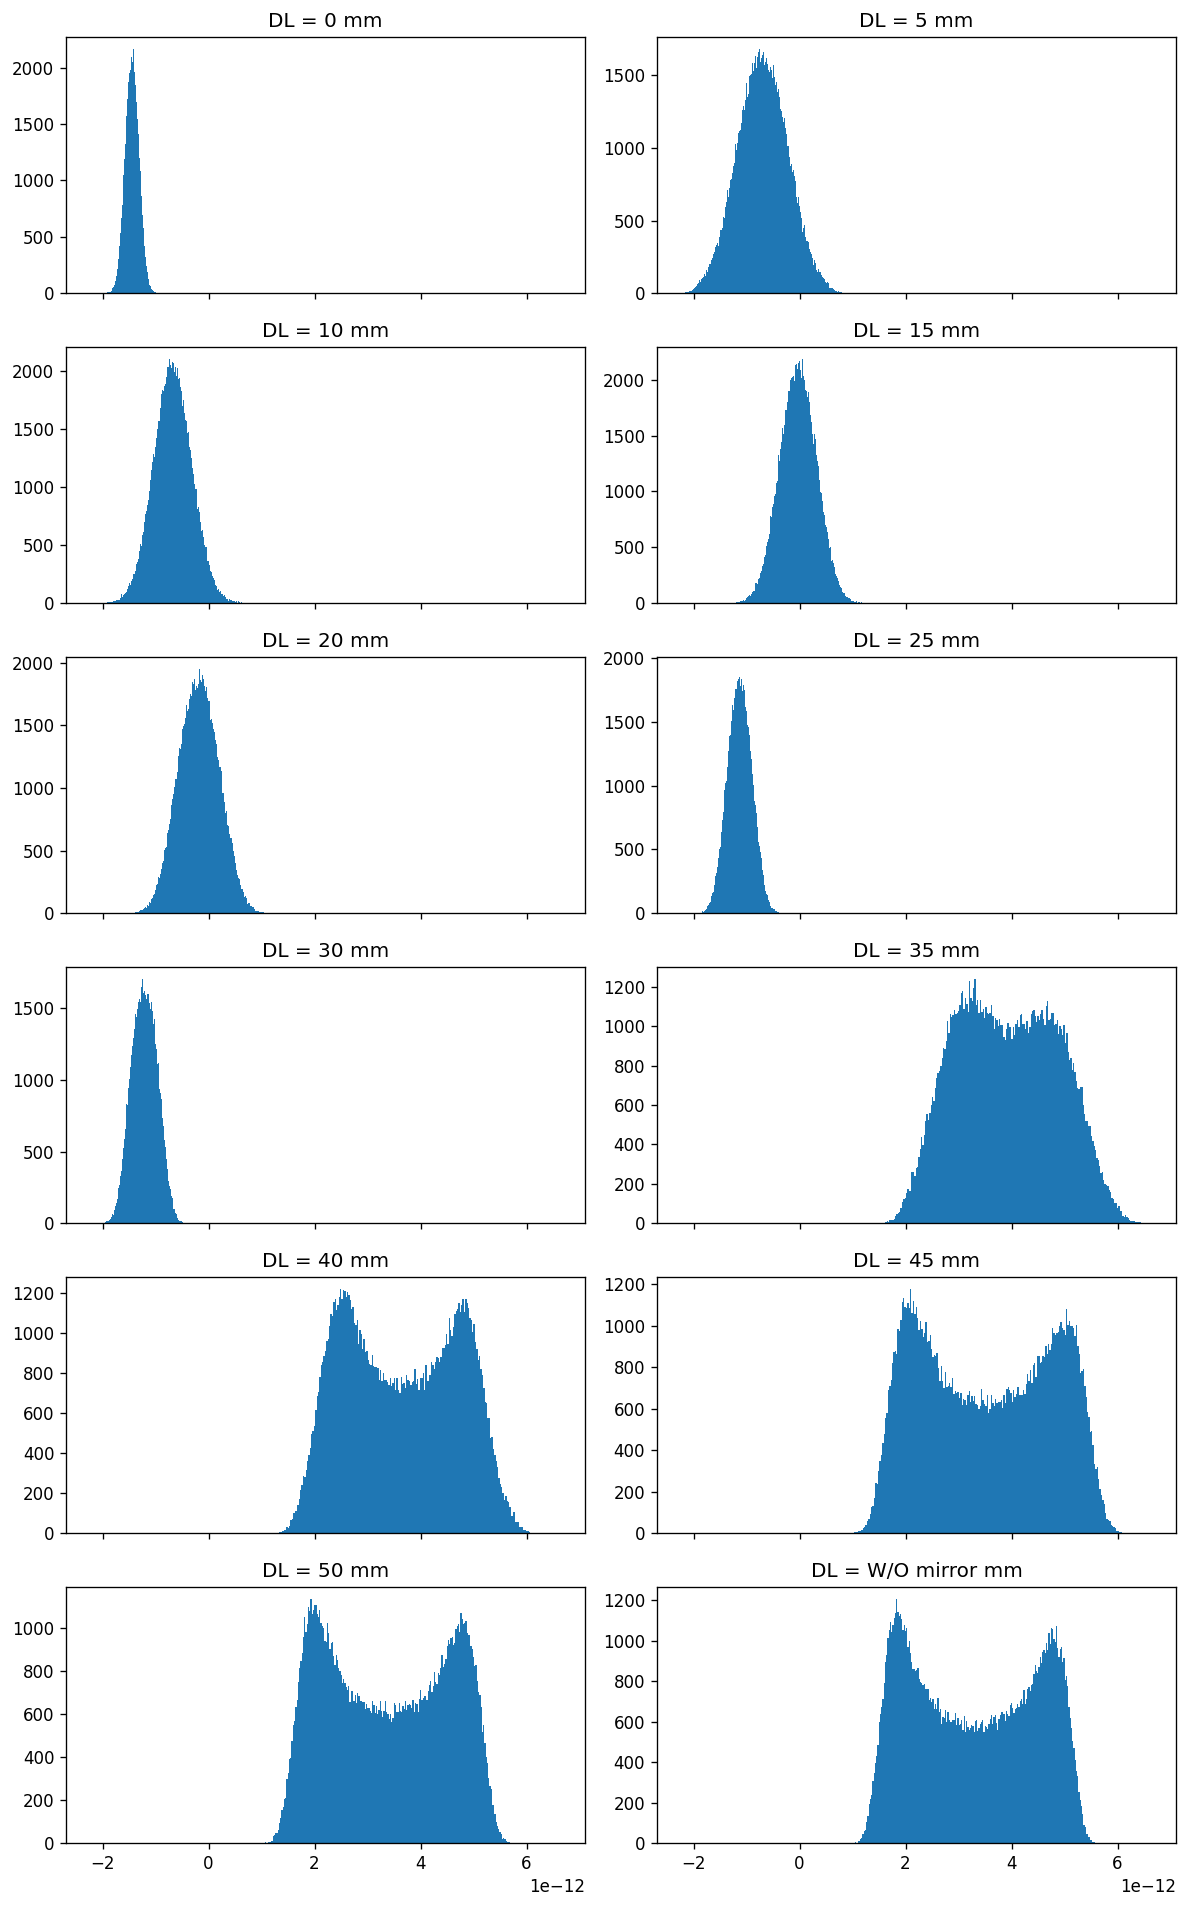

In [58]:
fig, axes = plt.subplots(6, 2, figsize=(10, 16), dpi=120, sharex="all")
for ax, hist, length in zip(np.ravel(axes), hists, lengths):
    ax.hist(hist, bins=200)
    ax.set_title("DL = {} mm".format(length))
plt.tight_layout()
plt.savefig("figures/interference_statistics/before.pdf")

## With after correction where appropriate

In [54]:
fprefix  = "Feedback_11.08.23-/170823/C3interference_with_mirror_"
fpostfix1 = "_train00000.txt"
fpostfix2 = "_train_after00000.txt"
lengths = [i for i in range(0, 51, 5)]
lengths.append("W/O mirror")
fnames = [fprefix+str(l)+fpostfix2 for l in range(0, 31, 5)]
fnames.extend([fprefix+str(l)+fpostfix1 for l in range(35, 51, 5)])
fnames.append("Feedback_11.08.23-/170823/C3interference_without_mirror_train_after00000.txt")

start_id = 26
hists_after = []

for file in fnames:
    data = read_oscillograph_data(file)
    k = int(np.trunc((data.shape[0]-start_id)/16) * 16 + start_id)
    for_sum = np.reshape(data[start_id:k,1], (16,-1), "F")
    sums = np.sum(for_sum, axis=0)
    hists_after.append(sums[0::2]*step)

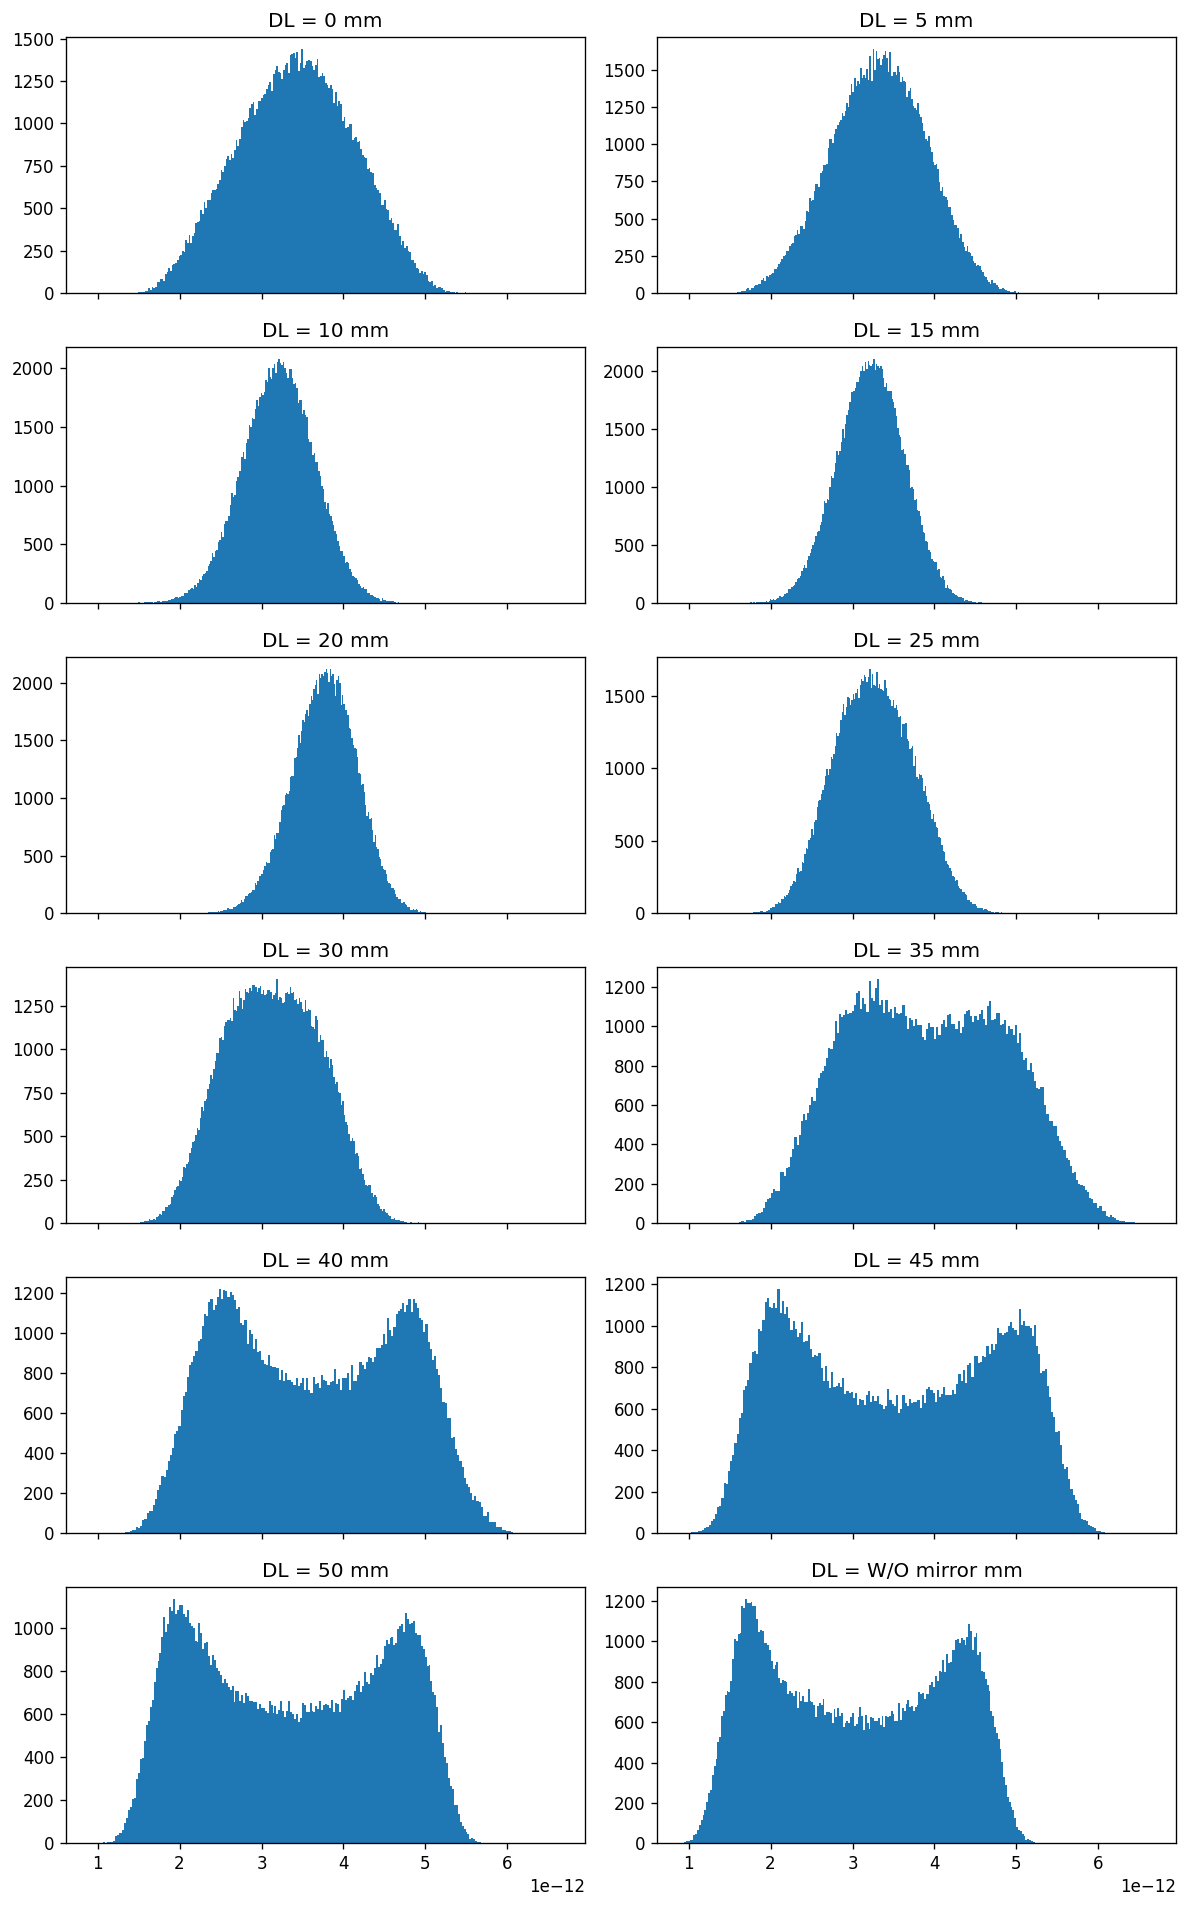

In [57]:
fig, axes = plt.subplots(6, 2, figsize=(10, 16), dpi=120, sharex="all")
for ax, hist, length in zip(np.ravel(axes), hists_after, lengths):
    ax.hist(hist, bins=200)
    ax.set_title("DL = {} mm".format(length))
plt.tight_layout()
plt.savefig("figures/interference_statistics/after.pdf")